In [ ]:
from PIL import Image
im_file = 'page_01.jpg'
im = Image.open(im_file)
im.save('page_01_1.jpg')

In [ ]:
conda install -c conda-forge opencv


In [ ]:
pip install pytesseract

In [ ]:
import cv2
from PIL import Image
import pytesseract

In [ ]:
import cv2
from matplotlib import pyplot as plt
image_file = 'page_01.jpg'
img = cv2.imread(image_file)

In [ ]:
# https://stackoverflow.com/questions/28816046/
# displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    
    height,width = im_data.shape[:2]

    # What size the figure need to be in inches to fit the image?
    figsize = width/float(dpi), height/float(dpi)
    
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize = figsize)
    ax = fig.add_axes([0,0,1,1])
    
    # Hide spines, ticks etc
    ax.axis('off')
    
    
    #Display the image
    ax.imshow(im_data, cmap = 'gray')
    
    plt.show()

In [ ]:
display(image_file)

# 01. Inverting Images

In [ ]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite('Apple/inverted.jpg',inverted_image)

In [ ]:
display('Apple/inverted.jpg')

# 03. Binarization

In [ ]:
def grayscale (image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [ ]:
gray_image = grayscale(img)
cv2.imwrite('Apple/gray.jpg',gray_image)

In [ ]:
display('Apple/gray.jpg')

In [ ]:
thresh, im_bw = cv2.threshold(gray_image,210,230,cv2.THRESH_BINARY)
cv2.imwrite('Apple/bw_image.jpg',im_bw)

In [ ]:
display('Apple/bw_image.jpg')

# 04. Noise Removal

In [ ]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1),np.uint8)
    image - cv2.dilate(image, kernel, iterations =1)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations =1)
    image = cv2.morphologyEx(image,cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image,3)
    return(image)


In [25]:
no_noise = noise_removal(im_bw)
cv2.imwrite('Apple/no_noise.jpg',no_noise)


True

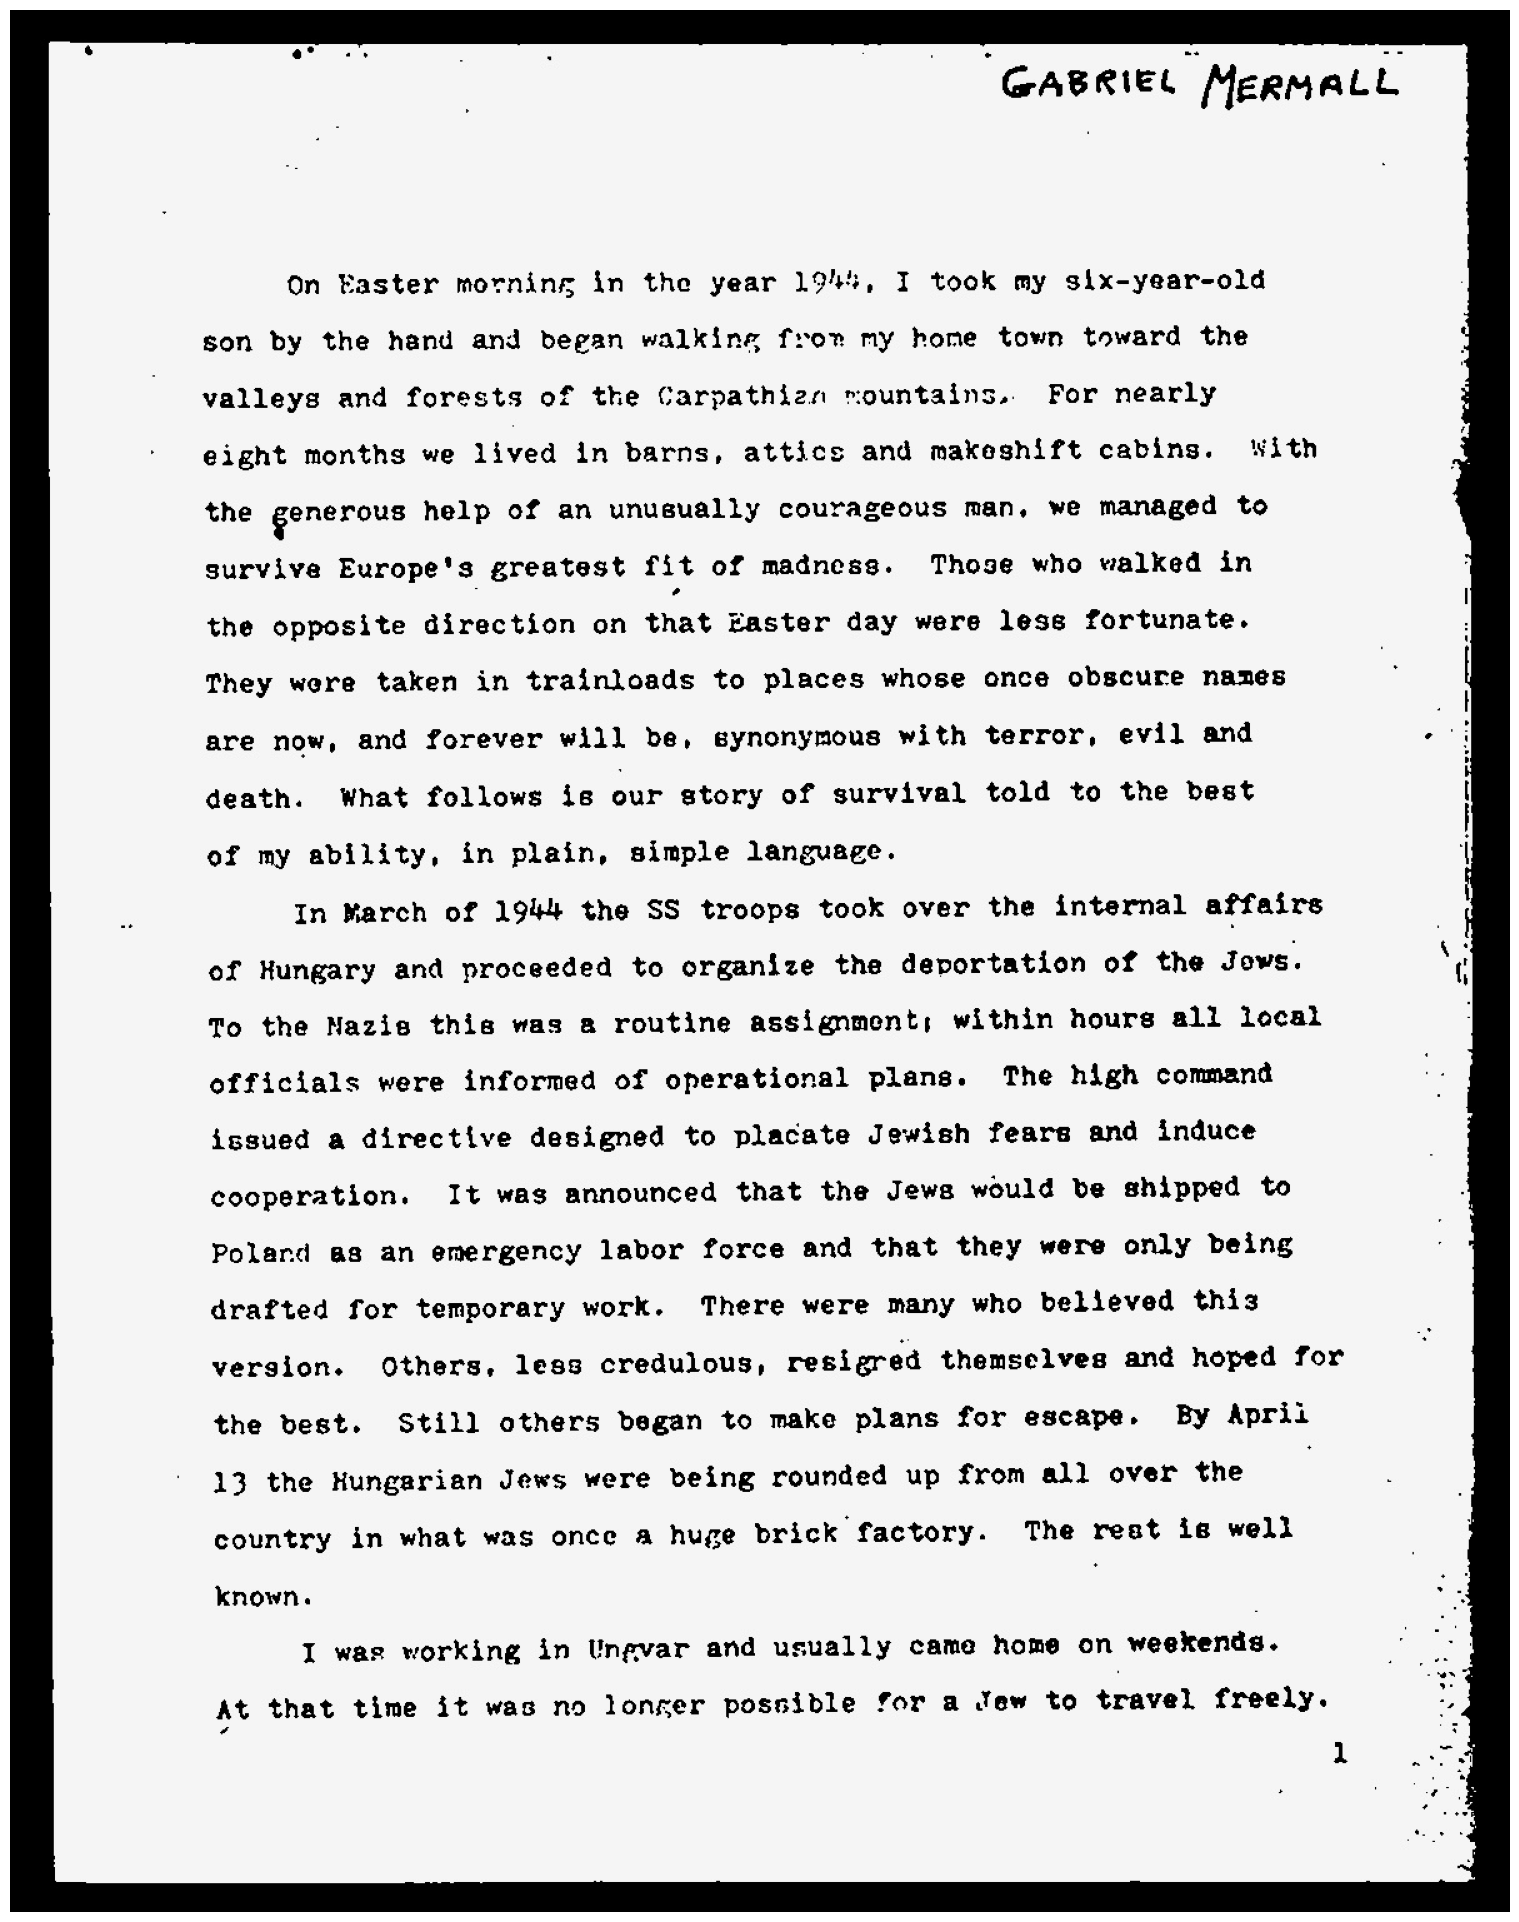

In [26]:
display('Apple/no_noise.jpg')

In [8]:
pip install pytesseract


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tesseract-ocr

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.8/2.8 MB 17.7 MB/s eta 0:00:00
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
  Running setup.py install for tesseract-ocr: started
  Running setup.py install for tesseract-ocr: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [10 lines of output]
  C:\Users\kound\anaconda3\lib\site-packages\setuptools\dist.py:770: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    warnings.warn(
  running bdist_wheel
  running build
  running build_py
  file tesseract_ocr.py (for module tesseract_ocr) not found
  file tesseract_ocr.py (for module tesseract_ocr) not found
  running build_ext
  building 'tesseract_ocr' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tesseract-ocr
  error: subprocess-exited-with-error
  
  Running setup.py instal

In [5]:
pytesseract.pytesseract.tesseract_cmd =r'C:/Program Files/Tesseract-OCR/tesseract.exe'

In [6]:
import pytesseract
from PIL import Image


In [7]:
img_file = 'page_01.jpg'
no_noise  = 'Apple/no_noise.jpg'


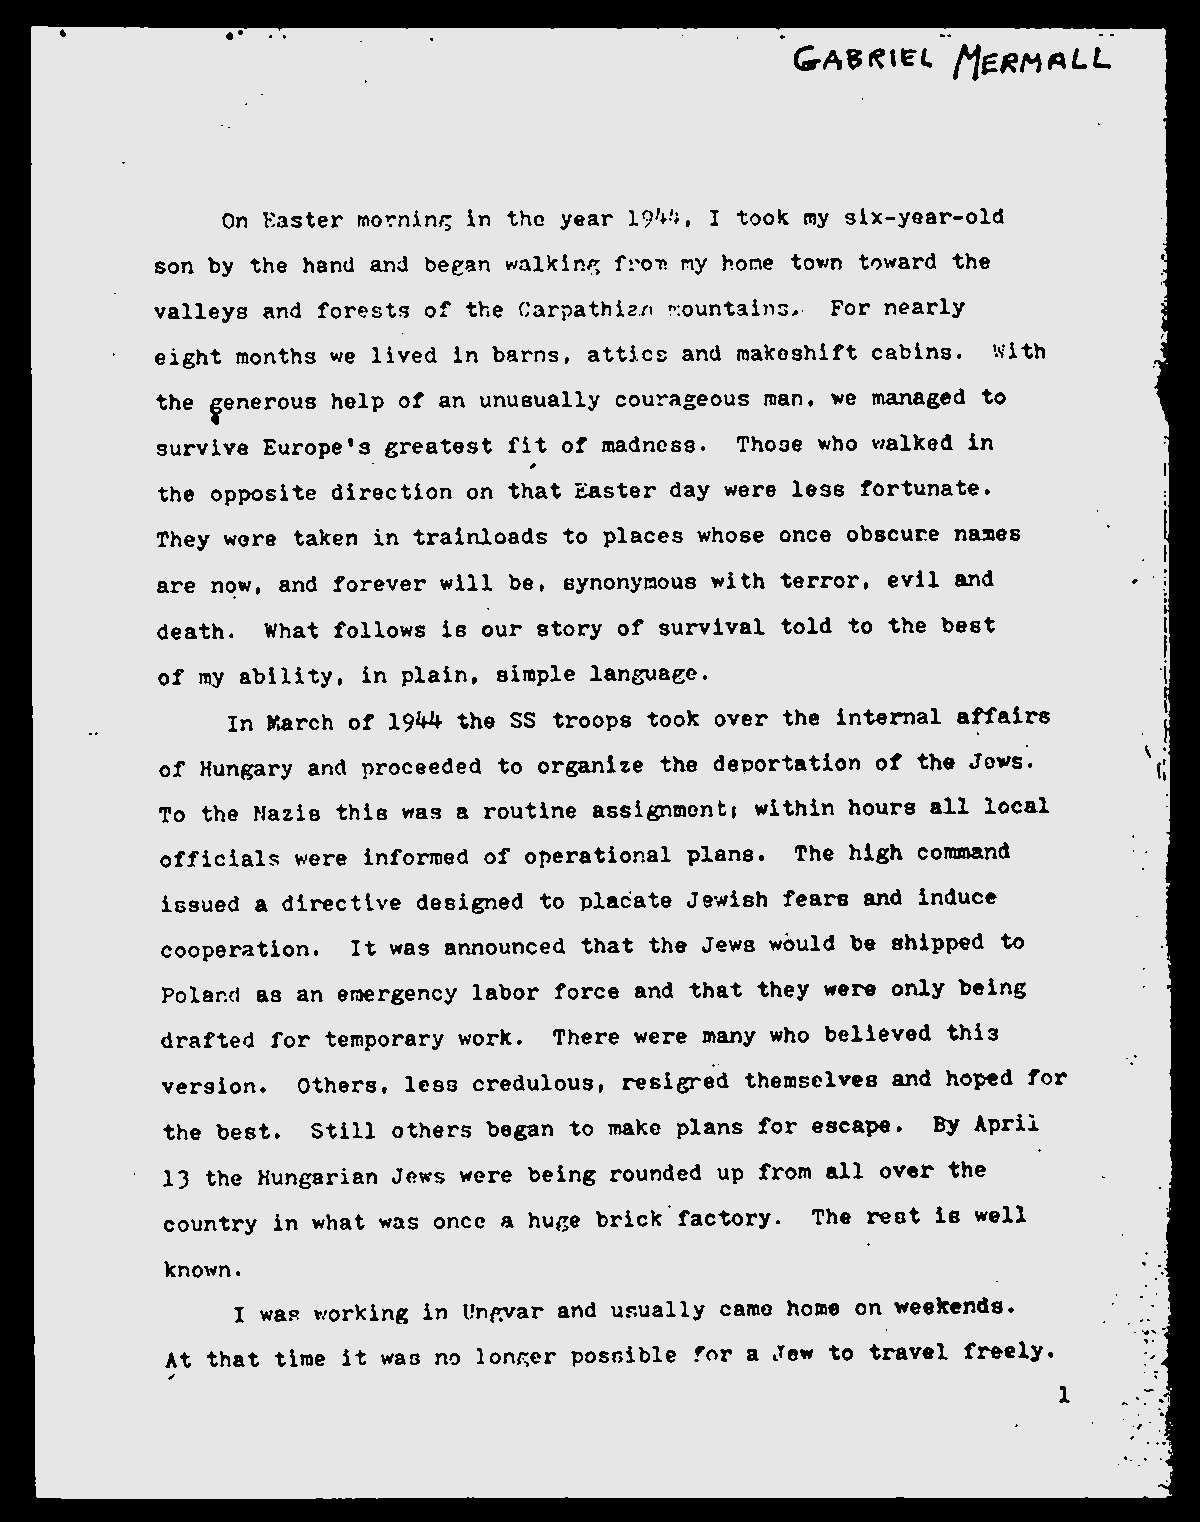

In [8]:
img = Image.open(no_noise)
display(img)

In [9]:
ocr_result = pytesseract.image_to_string(img)
print(ocr_result)

“GABRIEL Meamall

On Easter movning in the year 1944, I took my six-year-old
son by the hand and began walking fron my home town toward the
valleys and forests of the Carpathizn mountains. For nearly
eight months we lived in barns, attics and makeshift eabins. With
the gene nous help of an unusually courageous man, we managed to
survive Europe's greatest fit of madness. Those who walked in
the opposite direction on that Easter day were lese fortunate.
They were taken in trainloads to places whose once obscure names
are now, and forever will be, synonymous with terror, evil and
death. What follows is our story of survival told to the best
of my ability, in plain, simple language.

In March of 1944 the SS troops took over the internal affairs
of Hungary and proceeded to organize the deportation of the dows.
To the Nazie thie was a routine assignment; within hours all local
officials were informed of operational plans. The high command
issued a directive designed to placate Jewish fears a